In [11]:
# import required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [75]:
# ask
#1. How students perform when they are offered reduced/free meal
#2. score dependency on gender
#3. relation between ethinicity and score
#4. scores comparision based on test preperation course
#5. graph indicating level of education

In [13]:
# prepare - acuire data 
# import data
df = pd.read_csv('StudentsPerformance.csv')

# remove all null values
df.dropna(axis=0, how='all')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [140]:
#1. How students perform when they are offered reduced/free meal
reduced_meal_df = df.loc[(df['lunch']=='free/reduced')]
standard_df = df.loc[(df['lunch'])!='free/reduced']

lunch_score = df.groupby('lunch', as_index=False).sum()

score_reduced = lunch_score.iloc[0,1:4].to_numpy()
score_standard = lunch_score.iloc[1,1:4].to_numpy()

score_reduced_avg = score_reduced/len(reduced_meal_df)
score_standard_avg = score_standard/len(standard_df)

#2. score dependency on gender
gen_female_df = df.loc[(df['gender'])=='female']
gen_male_df = df.loc[(df['gender'])=='male']
gen_cnt = [len(gen_male_df), len(gen_female_df)]
gen_score = df.groupby('gender', as_index=False).sum()

score_female = gen_score.iloc[0,1:4].to_numpy()
score_male = gen_score.iloc[1,1:41].to_numpy()

score_female_avg = score_female/gen_cnt[1]
score_male_avg = score_male/gen_cnt[0]

#3. relation between ethinicity and score
ethinicity_score = df.groupby('race/ethnicity', as_index=False).mean()

#4. scores comparision based on test preperation course
avg_prep_score = df.groupby('test preparation course', as_index=False).mean()

In [142]:
# analyse phase
#1. How students perform when they are offered reduced/free meal
print('average score for student having free/reduced meal: ')
print('maths: ',score_reduced_avg[0])
print('reading: ',score_reduced_avg[1])
print('writing: ',score_reduced_avg[2])

print('\n')
print('average score for student having standard meal: ')
print('maths: ',score_standard_avg[0])
print('reading: ',score_standard_avg[1])
print('writing: ',score_standard_avg[2])

# The average scores of students who standard meal is more than those having reduced/free meal 
# from this it is clear that if a student have standard meal then his score will improve drastically

#2. score dependency on gender
print('--------------------------------------------------')
print('male count: ',gen_cnt[0])
print('female count: ',gen_cnt[1])
print('\n')

print('female')
print('maths: ',score_female_avg[0])
print('reading: ',score_female_avg[1])
print('writing: ',score_female_avg[2])

print('\nmale')
print('maths: ',score_male_avg[0])
print('reading: ',score_male_avg[1])
print('writing: ',score_male_avg[2])

# the score of female students is more in reading and writing exam, however male students perform well in maths exam

#3. relation between ethinicity and score
print('-----------------------------------------------------')
ethinicity_score

# group D and E has best performing students while A, B and C are average

average score for student having free/reduced meal: 
maths:  58.92112676056338
reading:  64.65352112676057
writing:  63.02253521126761


average score for student having standard meal: 
maths:  70.03410852713178
reading:  71.65426356589147
writing:  70.8232558139535
--------------------------------------------------
male count:  482
female count:  518


female
maths:  63.633204633204635
reading:  72.60810810810811
writing:  72.46718146718146

male
maths:  68.72821576763485
reading:  65.47302904564316
writing:  63.31120331950208
-----------------------------------------------------


,race/ethnicity,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


In [143]:
#4. scores comparision based on test preperation course
print('\n-----------------------------------------------------')
avg_prep_score


-----------------------------------------------------


,test preparation course,math score,reading score,writing score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


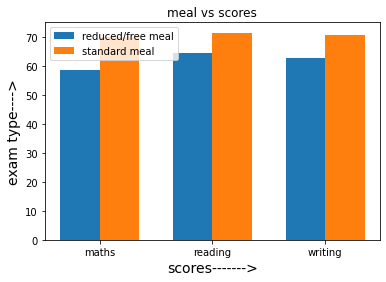

In [73]:
# Visualize phase
#1. How students perform when they are offered reduced/free meal
labels = ['maths', 'reading', 'writing']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score_reduced_avg, width, label='reduced/free meal')
rects2 = ax.bar(x + width/2, score_standard_avg, width, label='standard meal')
plt.legend()
plt.xlabel('scores------->', fontsize=14)
plt.ylabel('exam type---->', fontsize=14)
plt.title('meal vs scores')

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

# The average scores of students who standard meal is more than those having reduced/free meal 
# from this it is clear that if a student have standard meal then his score will improve drastically
# scores in subject like maths requires high concentration. so if meal given to student is reduced then thier score on maths is reduced
# it is seen from the graph that student having standard meal perform better in all three exam types

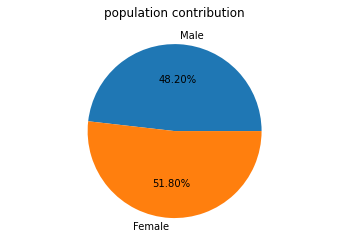

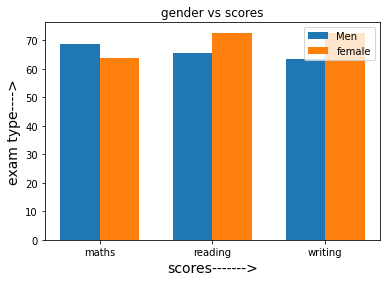

In [159]:
#2. score dependency on gender
plt.axis('equal')
plt.pie(gen_cnt, labels=['Male', 'Female'], autopct='%0.2f%%')
plt.title('population contribution')
plt.show()

# population contains ~49% male students and ~51% female students.

labels = ['maths', 'reading', 'writing']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score_male_avg, width, label='Men')
rects2 = ax.bar(x + width/2, score_female_avg, width, label='female')
plt.legend()
plt.xlabel('scores------->', fontsize=14)
plt.ylabel('exam type---->', fontsize=14)
plt.title('gender vs scores')

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

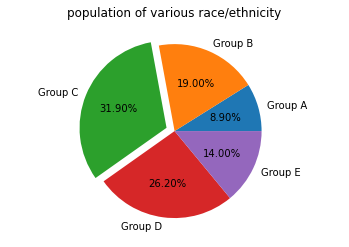

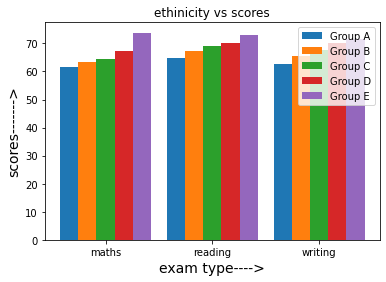

In [134]:
#3. relation between ethinicity and score
race_count = df.groupby('race/ethnicity').count()
race_arr = [race_count.iloc[0,1], race_count.iloc[1,1], race_count.iloc[2,1], race_count.iloc[3,1], race_count.iloc[4,1]]

plt.axis('equal')
explode = (0, 0, 0.1, 0, 0)
plt.pie(race_arr, labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'], explode=explode, autopct='%0.2f%%')
plt.title('population of various race/ethnicity')
plt.show()

labels = ['maths', 'reading', 'writing']
x = np.arange(len(labels))  # the label locations
width = 0.17  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width, ethinicity_score.iloc[0,1:4], width, label='Group A')
rects2 = ax.bar(x + width*2, ethinicity_score.iloc[1,1:4], width, label='Group B')
rects2 = ax.bar(x + width*3, ethinicity_score.iloc[2,1:4], width, label='Group C')
rects2 = ax.bar(x + width*4, ethinicity_score.iloc[3,1:4], width, label='Group D')
rects2 = ax.bar(x + width*5, ethinicity_score.iloc[4,1:4], width, label='Group E')
plt.legend()
plt.ylabel('scores------->', fontsize=14)
plt.xlabel('exam type---->', fontsize=14)
plt.title('ethinicity vs scores')

ax.set_xticks(x+width+0.34)
ax.set_xticklabels(labels)

plt.show()

# group D and E has best performing students while A, B and C are average

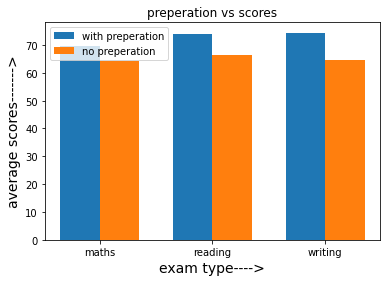

In [157]:
#4. scores comparision based on test preperation course

labels = ['maths', 'reading', 'writing']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_prep_score.iloc[0,1:4], width, label='with preperation')
rects2 = ax.bar(x + width/2, avg_prep_score.iloc[1,1:4], width, label='no preperation')
plt.legend()
plt.ylabel('average scores------->', fontsize=14)
plt.xlabel('exam type---->', fontsize=14)
plt.title('preperation vs scores')

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

# Students who did preperation course tends to perform well in exam.